# Data Generation


First step of the project was to solve the following problem and generate dataset for neural networks.
                                    
                                                min 1/(xyz) [ with respect to x,y,z]
                                            s.t (x*y + x*z + y*z) - a <= 0
                                                    y**b - x <= 0
                                                    x > 0
                                                    y > 0
                                                    z > 0
 
First import the necessary packages for solving this problem.

In [9]:
import cvxpy as cp
import numpy as np
import matplotlib.pyplot as plt

Define variables, parameters and constraints here.

In [10]:
# Variables
x = cp.Variable(pos=True)
y = cp.Variable(pos=True)
z = cp.Variable(pos=True)

# Parameters
a = cp.Parameter(pos=True)
b = cp.Parameter()

# Constraints
constraints = [x*y + y*z + x*z <=a,
               y**b <=x]


Objective function and range of parameters are defined next. For simplicity range of a = [1,10] and b = [0,10] are selected.

In [11]:
# Objective function
obj_fun = 1/(x*y*z)

# Objective
obj = cp.Minimize(obj_fun)

# Parameter range
input_a = np.linspace(1,10, num=100)
input_b = np.linspace(1,10, num=100)

aa,bb = np.meshgrid(input_a,input_b)

Define the problem and solve it

In [14]:
prob = cp.Problem(obj, constraints)

a_list=[]
b_list=[]

opt_list = []
x_list = []
y_list = []
z_list = []

for i in range(aa.shape[1]):
    a.value = aa[0,i]
    for j in range(bb.shape[1]):
        b.value = bb[j,i]
        prob.solve(gp=True)
        # save the results in lists
        a_list.append(a.value)
        b_list.append(b.value)
        opt_list.append(prob.value)
        x_list.append(x.value)
        y_list.append(y.value)
        z_list.append(z.value)
               

Plot the results

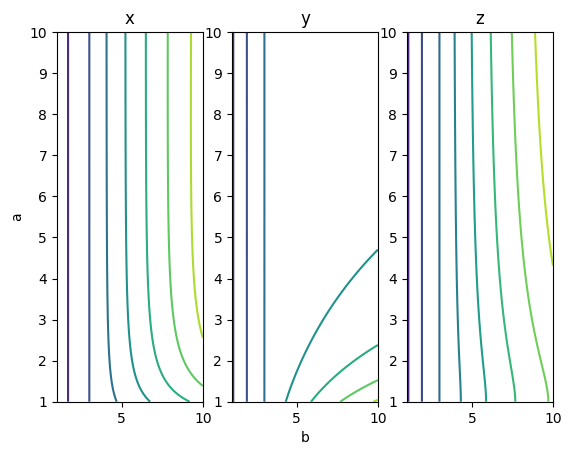

In [15]:
u,v = np.meshgrid(input_a, input_b)
u = u.flatten()
v = v.flatten()

fig,ax = plt.subplots(1,3)

cx = ax[0].tricontour(v,u, x_list)
ax[0].set_title('x')
ax[0].set_ylabel('a')

cy = ax[1].tricontour(v,u, y_list)
ax[1].set_title('y')
ax[1].set_xlabel('b')

cz = ax[2].tricontour(v,u, z_list)
ax[2].set_title('z')

plt.show()

Prepare the dataset for neural network training

In [17]:
a = np.array(a_list).reshape(-1,1)
b = np.array(b_list).reshape(-1,1)
ab = np.concatenate((a,b), axis=1)

x = np.array(x_list).reshape(-1,1)
y = np.array(y_list).reshape(-1,1)
z = np.array(z_list).reshape(-1,1)
xyz = np.concatenate((x,y,z), axis=1)



Split the dataset for training and test.

In [18]:
from sklearn.model_selection import train_test_split
ab_train, ab_valid, xyz_train, xyz_valid = train_test_split(ab,xyz,test_size=0.25,random_state=42)